# Fruits Images Classifier

### https://www.kaggle.com/moltean/fruits

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
import cv2
import os
from matplotlib.image import imread

In [46]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Dropout, Flatten

### Image dataset

In [4]:
train_base_path = './DATA/Training'
test_base_path = './DATA/Test'

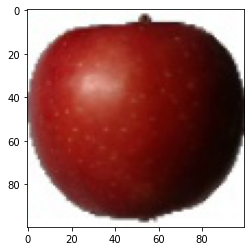

In [20]:
img_name = os.listdir(train_base_path+'/Apple Braeburn')[10]
img_path = train_base_path+'/Apple Braeburn/'+img_name

plt.imshow(imread(img_path))

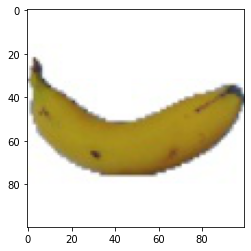

In [27]:
img_name = os.listdir(train_base_path+'/Banana')[10]
img_path = train_base_path+'/Banana/'+img_name

plt.imshow(imread(img_path))

In [25]:
cv2.imread(img_path).shape

(100, 100, 3)

In [30]:
cv2.imread(img_path).min(),cv2.imread(img_path).max()

(9, 255)

## ImageDataGenerator

In [31]:
train_image_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               horizontal_flip = True)


test_image_gen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_image_gen.flow_from_directory(train_base_path,
                                   target_size=(100,100),
                                   batch_size=32,
                                   class_mode='sparse')

Found 67692 images belonging to 131 classes.


In [36]:
testing_set = test_image_gen.flow_from_directory(test_base_path,
                                   target_size=(100,100),
                                   batch_size=32,
                                   class_mode='sparse',
                                   shuffle=False)

Found 22688 images belonging to 131 classes.


## Building CNN Model

In [42]:
image_shape = (100, 100,3)

In [44]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))


# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))


# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))

# OUTPUT LAYER SOFTMAX --> MULTI CLASS PROBLEM
model.add(Dense(units=131,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [47]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [48]:
%%timeit -n1 -r1

model.fit(x = training_set, validation_data = testing_set, epochs = 20,
         callbacks=[early_stop])

Epoch 1/20
2116/2116 [==============================] - 713s 337ms/step - loss: 2.6504 - accuracy: 0.3432 - val_loss: 0.3196 - val_accuracy: 0.9178
Epoch 2/20
2116/2116 [==============================] - 640s 303ms/step - loss: 0.6436 - accuracy: 0.7851 - val_loss: 0.2413 - val_accuracy: 0.9335
Epoch 3/20
2116/2116 [==============================] - 644s 304ms/step - loss: 0.4610 - accuracy: 0.8423 - val_loss: 0.1974 - val_accuracy: 0.9515
Epoch 4/20
2116/2116 [==============================] - 644s 304ms/step - loss: 0.3794 - accuracy: 0.8719 - val_loss: 0.1749 - val_accuracy: 0.9613
Epoch 5/20
2116/2116 [==============================] - 641s 303ms/step - loss: 0.3178 - accuracy: 0.8926 - val_loss: 0.1327 - val_accuracy: 0.9706
Epoch 6/20
2116/2116 [==============================] - 650s 307ms/step - loss: 0.2717 - accuracy: 0.9062 - val_loss: 0.1673 - val_accuracy: 0.9590
Epoch 7/20
2116/2116 [==============================] - 636s 301ms/step - loss: 0.2497 - accuracy: 0.9161 - val_

## Model Accuracy
- Accuracy: 95.25%
- Validation Accuracy: 97.65%

## Prediction 

In [142]:
fruits = []
for key, value in training_set.class_indices.items():
    fruits.append(key)

In [191]:
folder_name = '/Corn/'
new_img_name = os.listdir(train_base_path+folder_name)[10]
new_img_path = train_base_path+folder_name+img_name

In [192]:
new_img_path

'./DATA/Training/Corn/121_100.jpg'

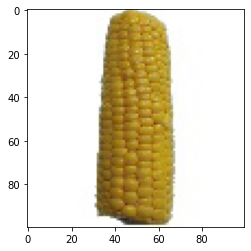

In [193]:
img = cv2.imread(new_img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [194]:
img = img.reshape(1,100, 100, 3)

In [195]:
img.shape

(1, 100, 100, 3)

In [196]:
img = img/255

In [197]:
res = np.argmax(model.predict(img), axis=-1)
fruits[res[0]]

'Corn'

### Another Try

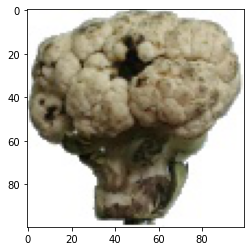

In [166]:
new_img_path = './DATA/Test/Cauliflower/12_100.jpg'
img = cv2.imread(new_img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [167]:
img = img.reshape(1,100, 100, 3)
img = img/255

In [168]:
res = np.argmax(model.predict(img), axis=-1)
fruits[res[0]]

'Cauliflower'

## Prediction on Unseen Data

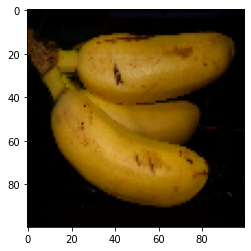

In [154]:
pred_img_path = './DATA/test-multiple_fruits/Bananas(lady_finger)5.jpg'
img = cv2.imread(pred_img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(100,100))
plt.imshow(img)

In [156]:
img = img.reshape(1,100, 100, 3)
img = img/255

In [157]:
res = np.argmax(model.predict(img), axis=-1)
fruits[res[0]]

'Banana Lady Finger'

## Saving Model

In [158]:
model.save('model_fruits.h5')

In [188]:
import joblib
joblib.dump(fruits,'fruit_indexes')

['fruit_indexes']